In [ ]:
import pandas as pd

df_good = pd.read_csv("/content/drive/Shareddrives/Grupo 4 SSC-5972/Checkpoint 1/Códigos Python/good.csv")

df_good

,chipid,minfreeheap,freeheap,internal_temperature,wifi_level,reset_reason1,reset_reason2
0,16153060,182776,265196,37.78,-37,1,14
1,16153060,182776,265196,37.78,-37,1,14
2,16153060,182776,265196,37.78,-38,1,14
3,16153060,182776,263608,37.78,-37,1,14
4,16153060,182776,265196,37.22,-37,1,14
...,...,...,...,...,...,...,...
531,16153060,182772,265196,38.33,-39,1,14
532,16153060,182772,265196,37.78,-39,1,14
533,16153060,182772,265196,37.78,-40,1,14
534,16153060,182772,265196,37.78,-40,1,14


In [ ]:
df_bad = pd.read_csv("/content/drive/Shareddrives/Grupo 4 SSC-5972/Checkpoint 1/Códigos Python/bad.csv")

df_bad

,chipid,minfreeheap,freeheap,internal_temperature,wifi_level,reset_reason1,reset_reason2
0,16013708,54920,69920,42.78,-64,12,12
1,16013708,54920,68328,42.78,-64,12,12
2,16013708,54920,69920,42.78,-63,12,12
3,16013708,54920,69920,42.78,-62,12,12
4,16013708,54920,69920,42.78,-64,12,12
...,...,...,...,...,...,...,...
511,16013708,54920,69920,43.33,-61,12,12
512,16013708,54920,69920,43.33,-60,12,12
513,16013708,54920,69920,43.33,-61,12,12
514,16013708,54920,69920,43.33,-63,12,12


In [ ]:
df = pd.concat([df_good,df_bad])

df

,chipid,minfreeheap,freeheap,internal_temperature,wifi_level,reset_reason1,reset_reason2
0,16153060,182776,265196,37.78,-37,1,14
1,16153060,182776,265196,37.78,-37,1,14
2,16153060,182776,265196,37.78,-38,1,14
3,16153060,182776,263608,37.78,-37,1,14
4,16153060,182776,265196,37.22,-37,1,14
...,...,...,...,...,...,...,...
511,16013708,54920,69920,43.33,-61,12,12
512,16013708,54920,69920,43.33,-60,12,12
513,16013708,54920,69920,43.33,-61,12,12
514,16013708,54920,69920,43.33,-63,12,12


In [ ]:
df[['chipid','minfreeheap','freeheap','internal_temperature','wifi_level']].groupby('chipid').mean()

,minfreeheap,freeheap,internal_temperature,wifi_level
chipid,,,,
16013708,54920.000000,69652.550388,42.820252,-61.844961
16153060,182775.350746,264961.611940,37.797910,-39.080224


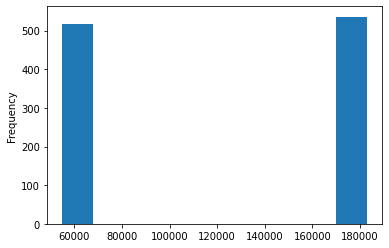

In [ ]:
df["minfreeheap"].plot(kind="hist")

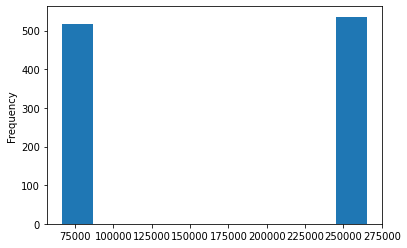

In [ ]:
df["freeheap"].plot(kind="hist")

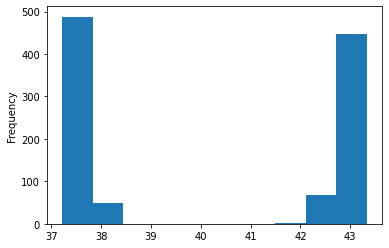

In [ ]:
df["internal_temperature"].plot(kind="hist")

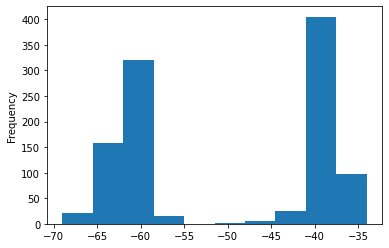

In [ ]:
df["wifi_level"].plot(kind="hist")

In [ ]:
df3 = df[['minfreeheap',	'freeheap',	'internal_temperature',	'wifi_level']]

df3.corr()

,minfreeheap,freeheap,internal_temperature,wifi_level
minfreeheap,1.000000,0.999977,-0.994183,0.986033
freeheap,0.999977,1.000000,-0.994258,0.986009
internal_temperature,-0.994183,-0.994258,1.000000,-0.981152
wifi_level,0.986033,0.986009,-0.981152,1.000000


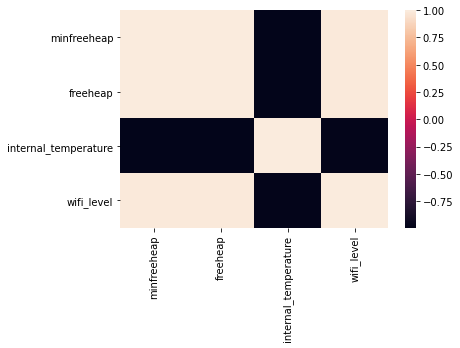

In [ ]:
import seaborn as sns

corr = df3.corr()

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)
df['kmean'] = kmeans.labels_

df

,chipid,minfreeheap,freeheap,internal_temperature,wifi_level,reset_reason1,reset_reason2,kmean
0,16153060,182776,265196,37.78,-37,1,14,1
1,16153060,182776,265196,37.78,-37,1,14,1
2,16153060,182776,265196,37.78,-38,1,14,1
3,16153060,182776,263608,37.78,-37,1,14,1
4,16153060,182776,265196,37.22,-37,1,14,1
...,...,...,...,...,...,...,...,...
511,16013708,54920,69920,43.33,-61,12,12,0
512,16013708,54920,69920,43.33,-60,12,12,0
513,16013708,54920,69920,43.33,-61,12,12,0
514,16013708,54920,69920,43.33,-63,12,12,0


In [ ]:
import pickle

pickle.dump(kmeans, open("/content/drive/Shareddrives/Grupo 4 SSC-5972/Checkpoint 1/Códigos Python/module_health_classifier.pkl", "wb"))

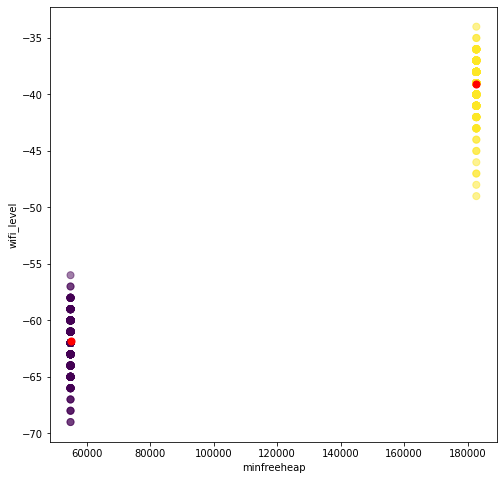

In [ ]:
import matplotlib.pyplot as plt

df2 = df[['minfreeheap', 'wifi_level']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['minfreeheap'], df2['wifi_level'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("minfreeheap")
plt.ylabel("wifi_level")

plt.show()

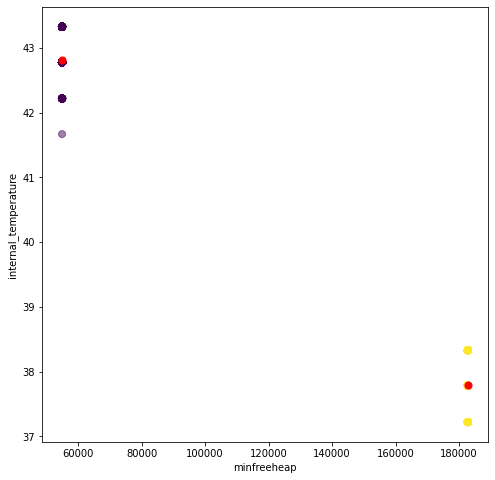

In [ ]:
df2 = df[['minfreeheap', 'internal_temperature']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['minfreeheap'], df2['internal_temperature'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("minfreeheap")
plt.ylabel("internal_temperature")

plt.show()

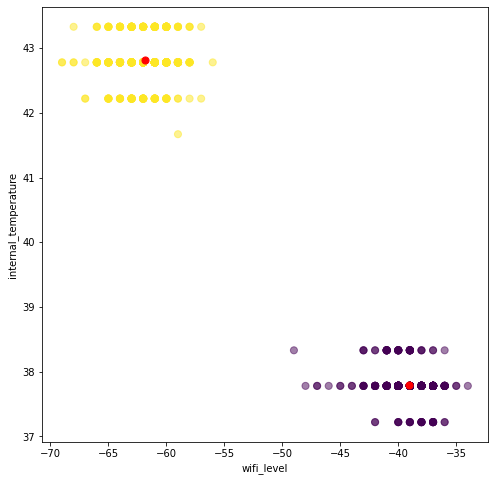

In [ ]:
df2 = df[['wifi_level', 'internal_temperature']].copy()

kmeans = KMeans(n_clusters=2).fit(df2)
centroids = kmeans.cluster_centers_

plt.figure(figsize = (8,8))

plt.scatter(df2['wifi_level'], df2['internal_temperature'],
            c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

plt.xlabel("wifi_level")
plt.ylabel("internal_temperature")

plt.show()